In [133]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.kepler_RK import fct_RK4_2D, k1, k2, l1, l2

In [134]:
def aphelie(x, y):
    r = np.sqrt(x**2 + y**2)
    r_min = np.min(r)
    r_max = np.max(r)
    r_min_ind = np.where(r == r_min)[0][0]
    r_max_ind = np.where(r == r_max)[0][0]
    return abs(r_min + r_max)/2, r_min_ind, r_max_ind

def get_periode_revolution(x, y, t, eps):
    for i in range (2, len(x)):
        if (np.abs(x[i] -  x[0]) < eps and np.abs(y[i] - y[0])< eps):
            return t[i] - t[0]


___________________Itération 1___________________
Pour une masse du soleil de 7 et une const de gravitation universelle de 5
La période de révolution est 10.19s
T^2 / a^3 = 1.1279392049302397 et 4pi^2/MG = 1.1279547886959267
Longeur de l'aphélie: 4.515309495938025


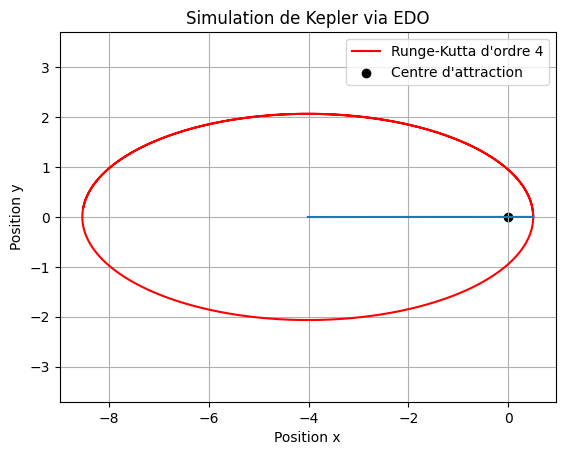

___________________Itération 2___________________
Pour une masse du soleil de 9 et une const de gravitation universelle de 5
La période de révolution est 7.71s
T^2 / a^3 = 71.03269923898515 et 4pi^2/MG = 0.8772981689857207
Longeur de l'aphélie: 0.9423520797062688


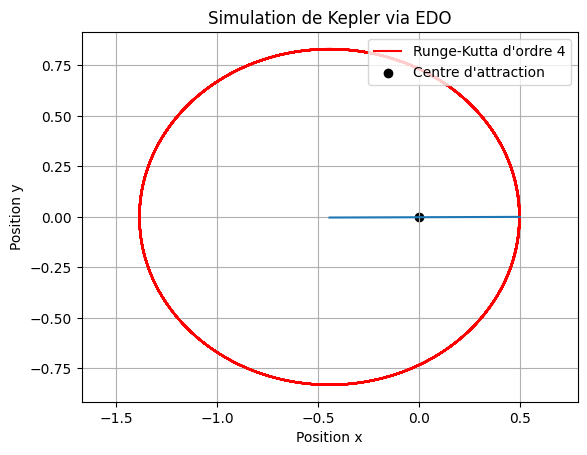

___________________Itération 3___________________
Pour une masse du soleil de 8 et une const de gravitation universelle de 6
La période de révolution est 4.57s
T^2 / a^3 = 40.29252918748995 et 4pi^2/MG = 0.8224670334241132
Longeur de l'aphélie: 0.8032821025731207


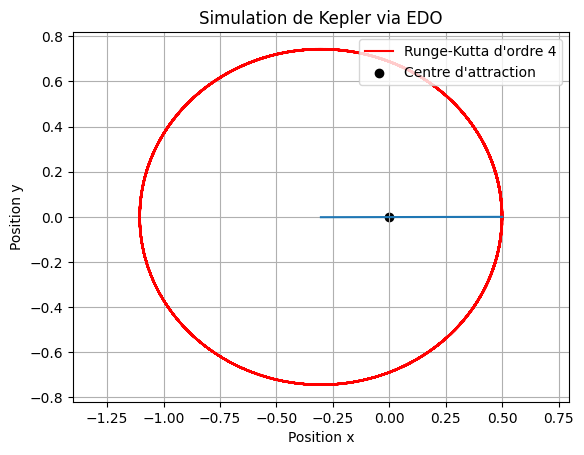

___________________Itération 4___________________
Pour une masse du soleil de 5 et une const de gravitation universelle de 7
La période de révolution est 10.19s
T^2 / a^3 = 1.1279392049302397 et 4pi^2/MG = 1.1279547886959267
Longeur de l'aphélie: 4.515309495938025


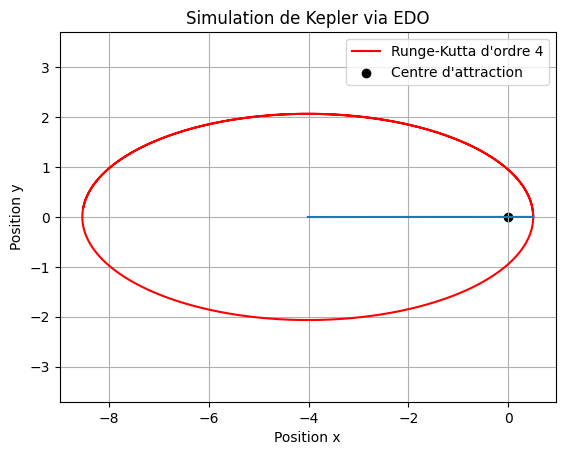

___________________Itération 5___________________
Pour une masse du soleil de 8 et une const de gravitation universelle de 7
La période de révolution est 11.200000000000001s
T^2 / a^3 = 551.9282082582926 et 4pi^2/MG = 0.7049717429349541
Longeur de l'aphélie: 0.6102407927655346


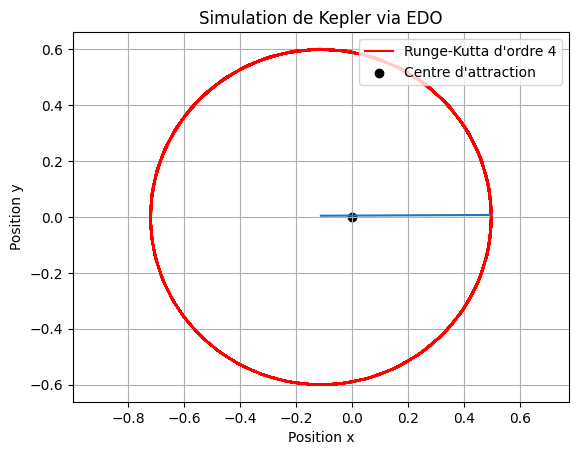

___________________Itération 6___________________
Pour une masse du soleil de 9 et une const de gravitation universelle de 7
La période de révolution est 1.51s
T^2 / a^3 = 15.720542868745607 et 4pi^2/MG = 0.6266415492755147
Longeur de l'aphélie: 0.5253518711882015


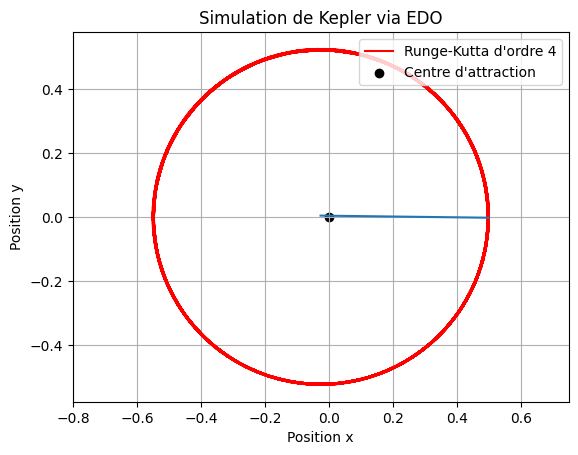

___________________Itération 7___________________
Pour une masse du soleil de 6 et une const de gravitation universelle de 8
La période de révolution est 4.57s
T^2 / a^3 = 40.29252918748995 et 4pi^2/MG = 0.8224670334241132
Longeur de l'aphélie: 0.8032821025731207


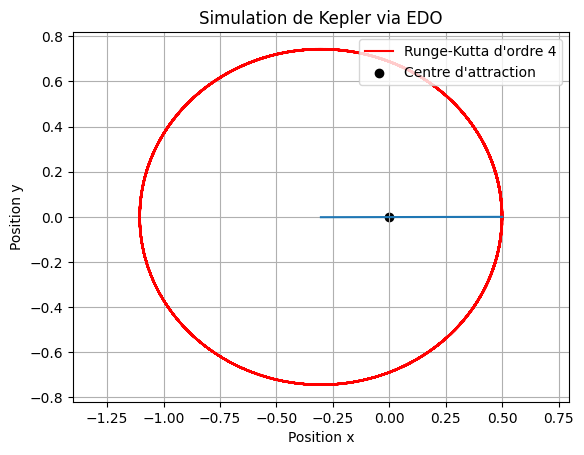

___________________Itération 8___________________
Pour une masse du soleil de 7 et une const de gravitation universelle de 8
La période de révolution est 11.200000000000001s
T^2 / a^3 = 551.9282082582926 et 4pi^2/MG = 0.7049717429349541
Longeur de l'aphélie: 0.6102407927655346


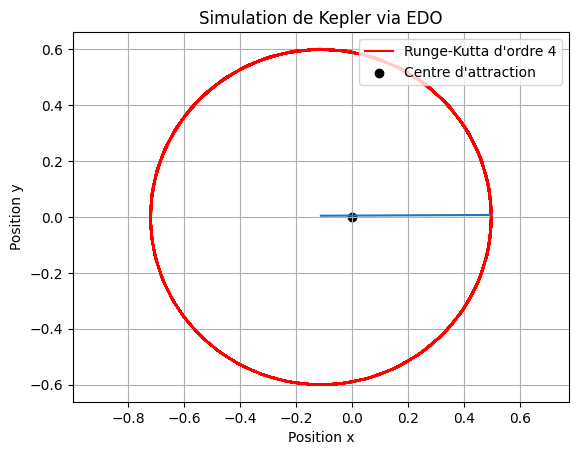

___________________Itération 9___________________
Pour une masse du soleil de 8 et une const de gravitation universelle de 8
La période de révolution est 1.46s
T^2 / a^3 = 15.494910460805803 et 4pi^2/MG = 0.6168502750680849
Longeur de l'aphélie: 0.515224549962779


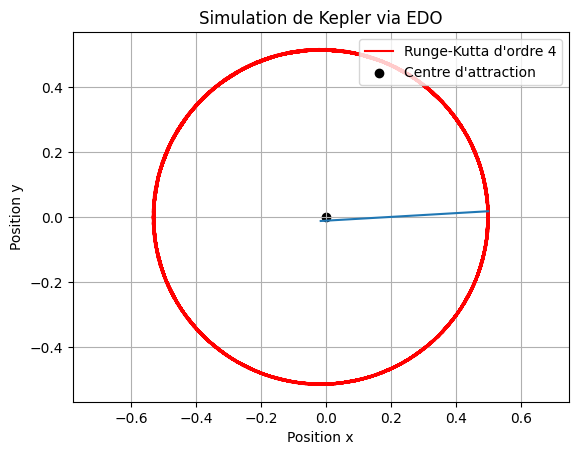

___________________Itération 10___________________
Pour une masse du soleil de 9 et une const de gravitation universelle de 8
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


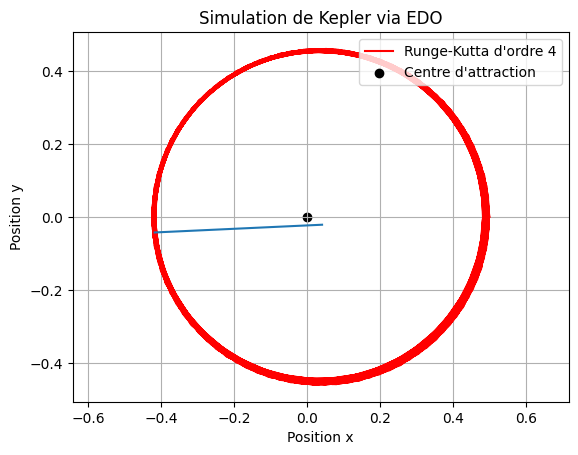

___________________Itération 11___________________
Pour une masse du soleil de 5 et une const de gravitation universelle de 9
La période de révolution est 7.71s
T^2 / a^3 = 71.03269923898515 et 4pi^2/MG = 0.8772981689857207
Longeur de l'aphélie: 0.9423520797062688


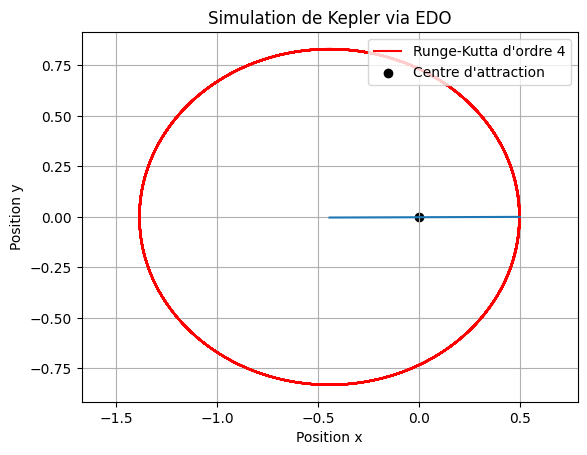

___________________Itération 12___________________
Pour une masse du soleil de 7 et une const de gravitation universelle de 9
La période de révolution est 1.51s
T^2 / a^3 = 15.720542868745607 et 4pi^2/MG = 0.6266415492755147
Longeur de l'aphélie: 0.5253518711882015


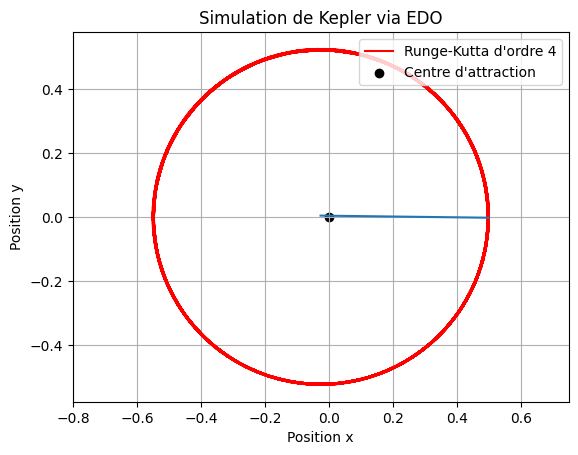

___________________Itération 13___________________
Pour une masse du soleil de 8 et une const de gravitation universelle de 9
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


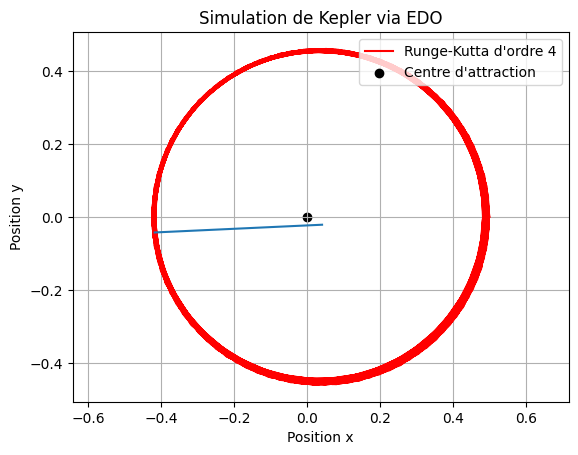

___________________Itération 14___________________
Pour une masse du soleil de 5 et une const de gravitation universelle de 10
La période de révolution est 1.69s
T^2 / a^3 = 7.106683355211441 et 4pi^2/MG = 0.7895683520871486
Longeur de l'aphélie: 0.7379315769116856


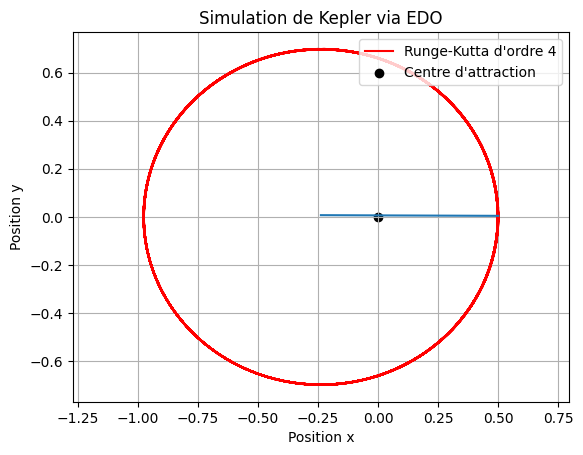

___________________Itération 15___________________
Pour une masse du soleil de 6 et une const de gravitation universelle de 10
La période de révolution est 13.46s
T^2 / a^3 = 1050.946188716997 et 4pi^2/MG = 0.6579736267392905
Longeur de l'aphélie: 0.5560745600822701


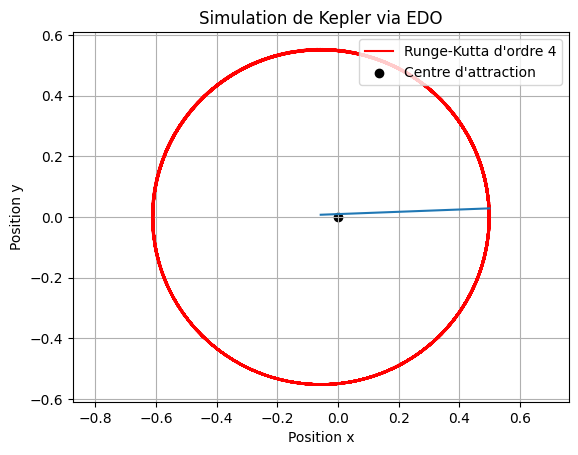

___________________Itération 16___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 11
La période de révolution est 11.46s
T^2 / a^3 = 129.12868726510882 et 4pi^2/MG = 0.8972367637353962
Longeur de l'aphélie: 1.0056411416309932


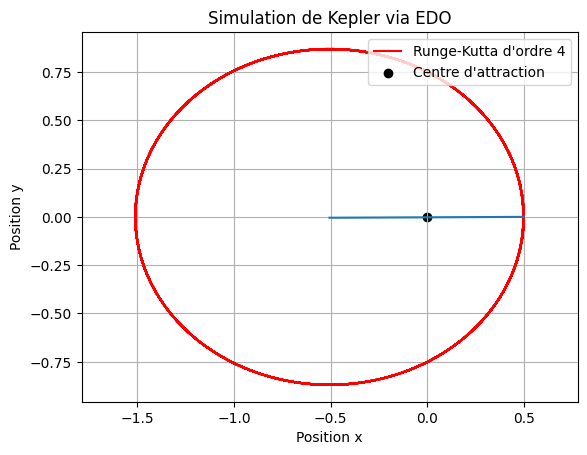

___________________Itération 17___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 12
La période de révolution est 4.57s
T^2 / a^3 = 40.29252918748995 et 4pi^2/MG = 0.8224670334241132
Longeur de l'aphélie: 0.8032821025731207


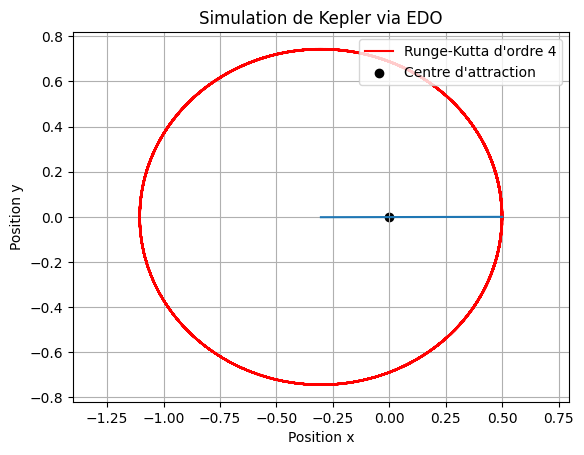

___________________Itération 18___________________
Pour une masse du soleil de 5 et une const de gravitation universelle de 12
La période de révolution est 13.46s
T^2 / a^3 = 1050.946188716997 et 4pi^2/MG = 0.6579736267392905
Longeur de l'aphélie: 0.5560745600822701


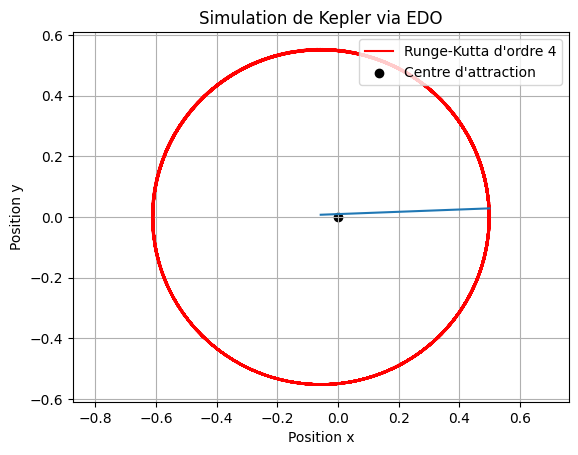

___________________Itération 19___________________
Pour une masse du soleil de 6 et une const de gravitation universelle de 12
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


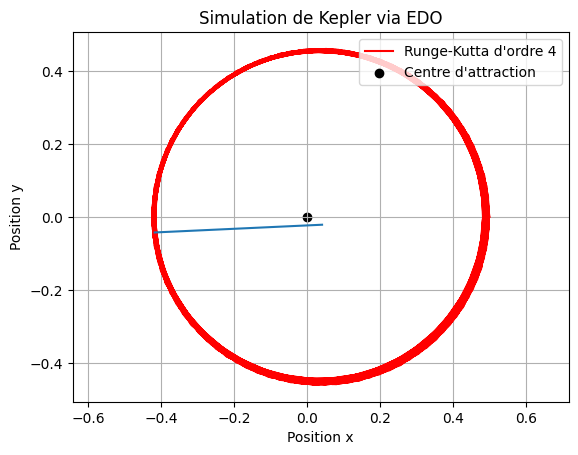

___________________Itération 20___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 13
La période de révolution est 6.44s
T^2 / a^3 = 128.24331734177963 et 4pi^2/MG = 0.7592003385453352
Longeur de l'aphélie: 0.6863383306180365


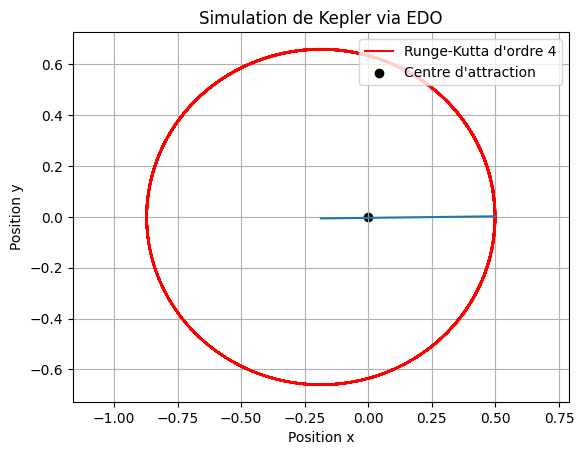

___________________Itération 21___________________
Pour une masse du soleil de 5 et une const de gravitation universelle de 13
La période de révolution est 4.5200000000000005s
T^2 / a^3 = 156.19621861358866 et 4pi^2/MG = 0.6073602708362682
Longeur de l'aphélie: 0.5071909586377047


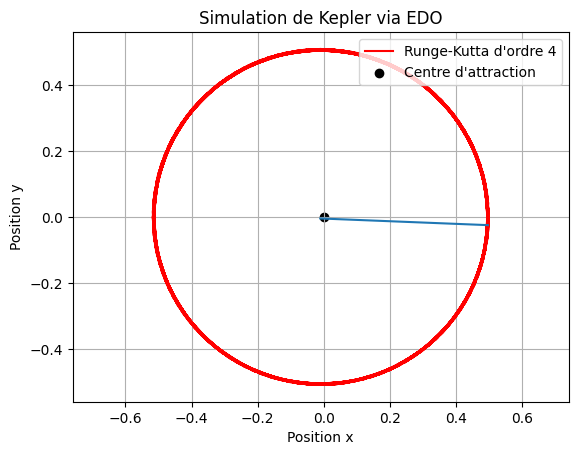

___________________Itération 22___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 14
La période de révolution est 11.200000000000001s
T^2 / a^3 = 551.9282082582926 et 4pi^2/MG = 0.7049717429349541
Longeur de l'aphélie: 0.6102407927655346


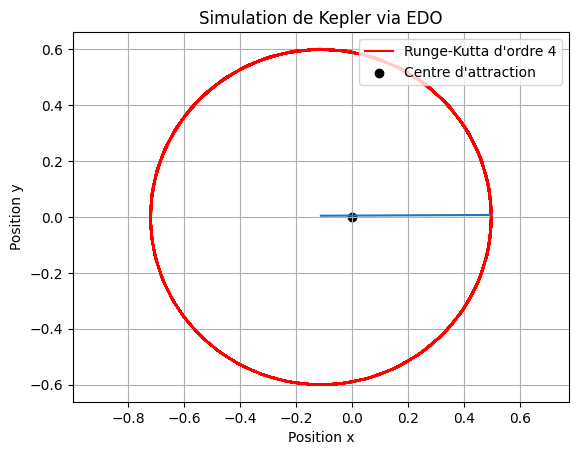

___________________Itération 23___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 15
La période de révolution est 7.71s
T^2 / a^3 = 71.03269923898515 et 4pi^2/MG = 0.8772981689857207
Longeur de l'aphélie: 0.9423520797062688


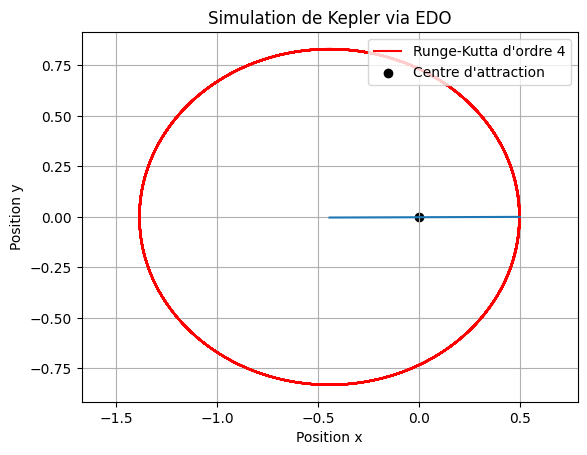

___________________Itération 24___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 15
La période de révolution est 13.46s
T^2 / a^3 = 1050.946188716997 et 4pi^2/MG = 0.6579736267392905
Longeur de l'aphélie: 0.5560745600822701


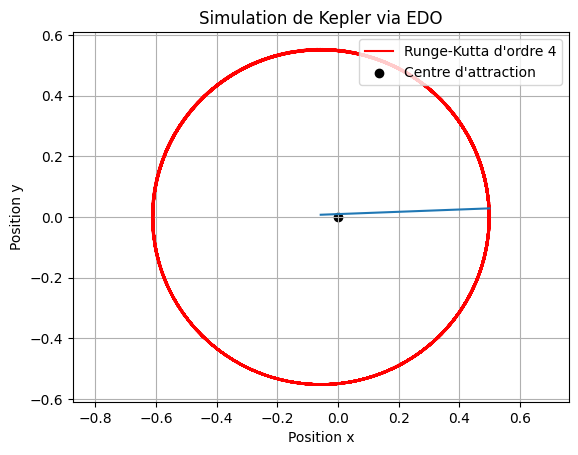

___________________Itération 25___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 16
La période de révolution est 4.57s
T^2 / a^3 = 40.29252918748995 et 4pi^2/MG = 0.8224670334241132
Longeur de l'aphélie: 0.8032821025731207


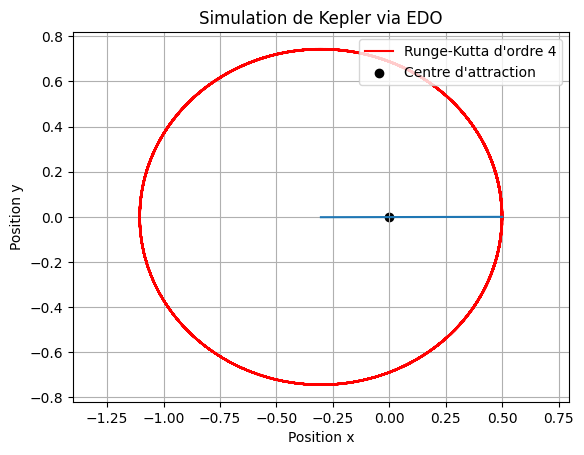

___________________Itération 26___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 16
La période de révolution est 1.46s
T^2 / a^3 = 15.494910460805803 et 4pi^2/MG = 0.6168502750680849
Longeur de l'aphélie: 0.515224549962779


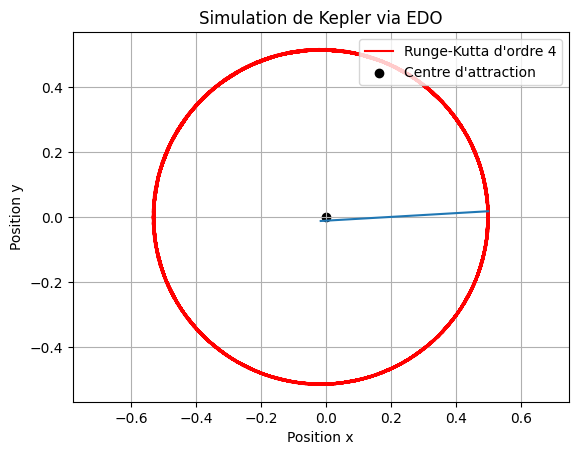

___________________Itération 27___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 17
La période de révolution est 3.69s
T^2 / a^3 = 37.92420907513083 et 4pi^2/MG = 0.774086619693283
Longeur de l'aphélie: 0.7107354063601103


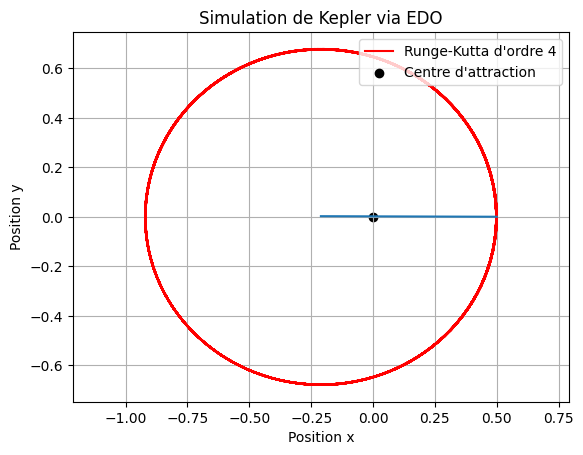

___________________Itération 28___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 17
La période de révolution est 4.13s
T^2 / a^3 = 149.74314870229227 et 4pi^2/MG = 0.5805649647699622
Longeur de l'aphélie: 0.4847412286980607


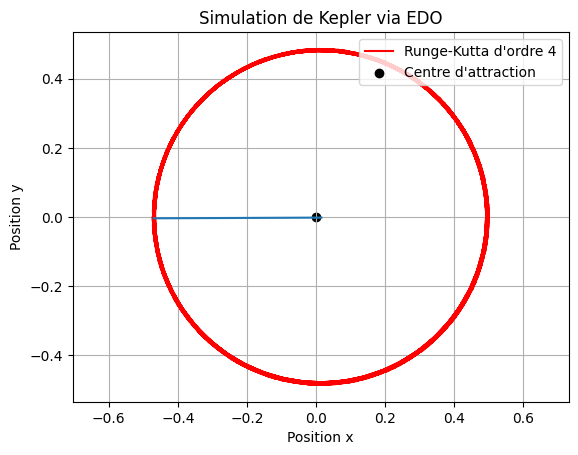

___________________Itération 29___________________
Pour une masse du soleil de 4 et une const de gravitation universelle de 18
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


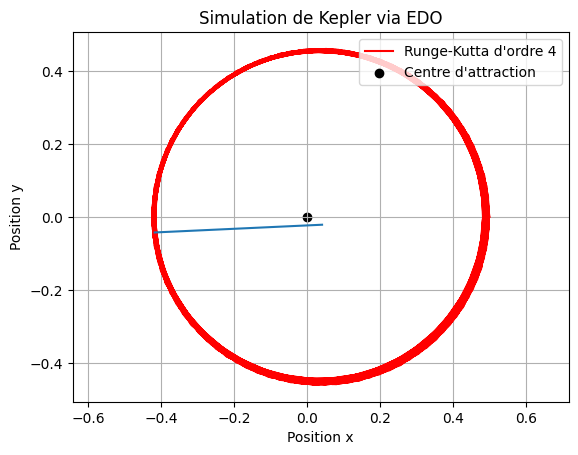

___________________Itération 30___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 19
La période de révolution est 2.72s
T^2 / a^3 = 1.0389432183321543 et 4pi^2/MG = 1.0389057264304586
Longeur de l'aphélie: 1.9238978009565313


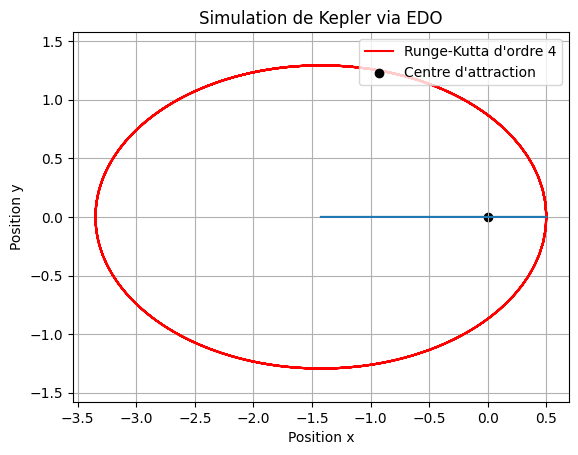

___________________Itération 31___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 19
La période de révolution est 12.6s
T^2 / a^3 = 753.0316292112159 et 4pi^2/MG = 0.6926038176203059
Longeur de l'aphélie: 0.5949041803054655


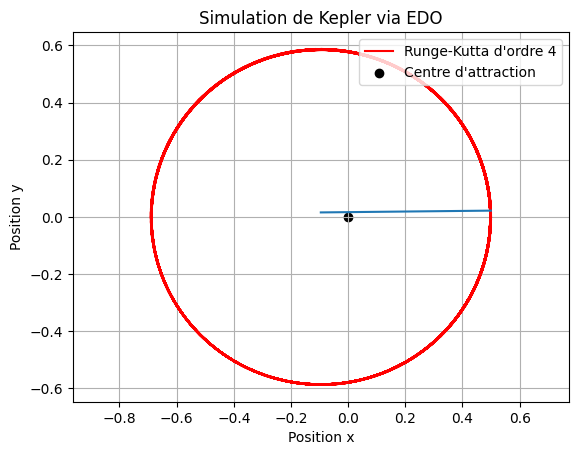

___________________Itération 32___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 20
La période de révolution est 13.46s
T^2 / a^3 = 1050.946188716997 et 4pi^2/MG = 0.6579736267392905
Longeur de l'aphélie: 0.5560745600822701


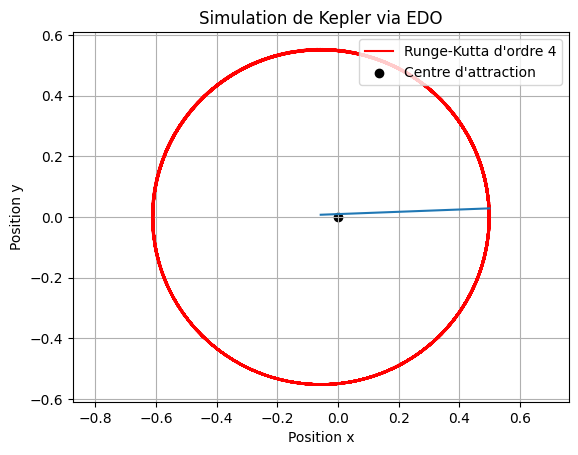

___________________Itération 33___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 21
La période de révolution est 1.51s
T^2 / a^3 = 15.720542868745607 et 4pi^2/MG = 0.6266415492755147
Longeur de l'aphélie: 0.5253518711882015


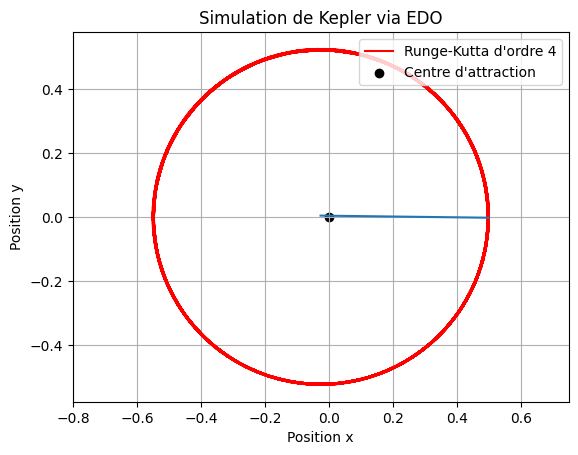

___________________Itération 34___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 22
La période de révolution est 11.46s
T^2 / a^3 = 129.12868726510882 et 4pi^2/MG = 0.8972367637353962
Longeur de l'aphélie: 1.0056411416309932


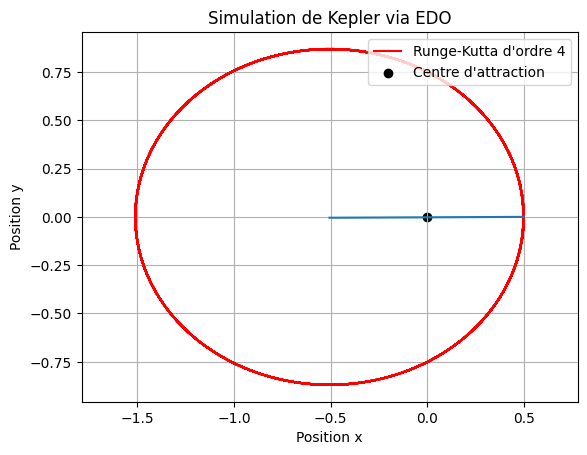

___________________Itération 35___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 23
La période de révolution est 2.0100000000000002s
T^2 / a^3 = 36.98431204290263 et 4pi^2/MG = 0.5721509797732961
Longeur de l'aphélie: 0.4756951485996849


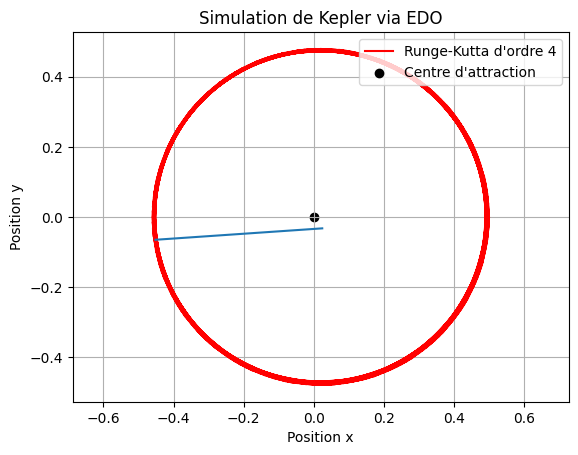

___________________Itération 36___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 24
La période de révolution est 4.57s
T^2 / a^3 = 40.29252918748995 et 4pi^2/MG = 0.8224670334241132
Longeur de l'aphélie: 0.8032821025731207


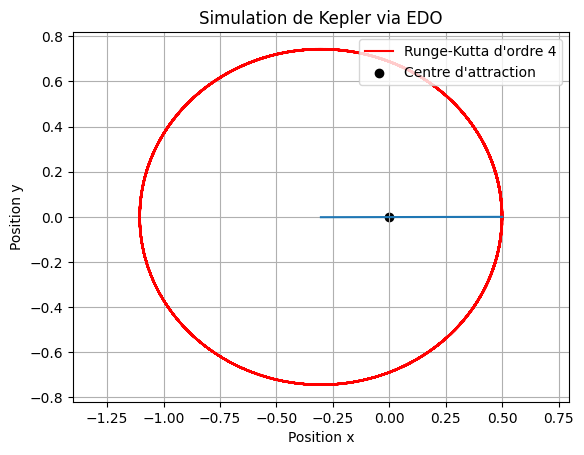

___________________Itération 37___________________
Pour une masse du soleil de 3 et une const de gravitation universelle de 24
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


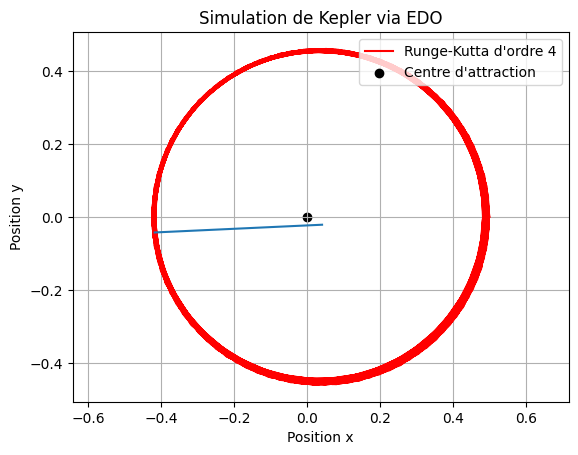

___________________Itération 38___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 25
La période de révolution est 1.69s
T^2 / a^3 = 7.106683355211441 et 4pi^2/MG = 0.7895683520871486
Longeur de l'aphélie: 0.7379315769116856


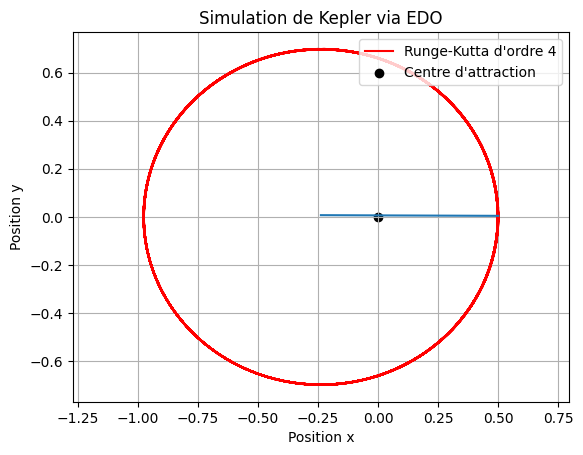

___________________Itération 39___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 26
La période de révolution est 6.44s
T^2 / a^3 = 128.24331734177963 et 4pi^2/MG = 0.7592003385453352
Longeur de l'aphélie: 0.6863383306180365


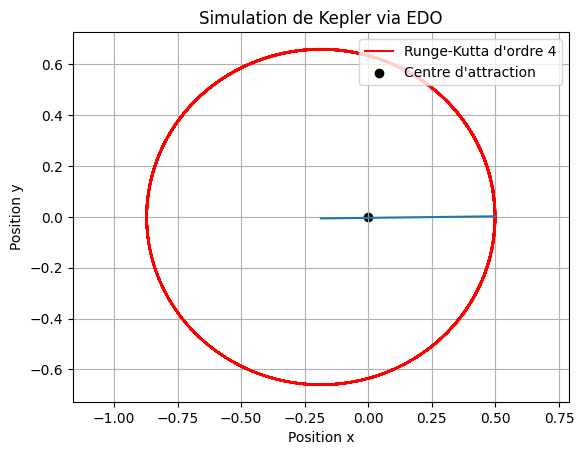

___________________Itération 40___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 28
La période de révolution est 11.200000000000001s
T^2 / a^3 = 551.9282082582926 et 4pi^2/MG = 0.7049717429349541
Longeur de l'aphélie: 0.6102407927655346


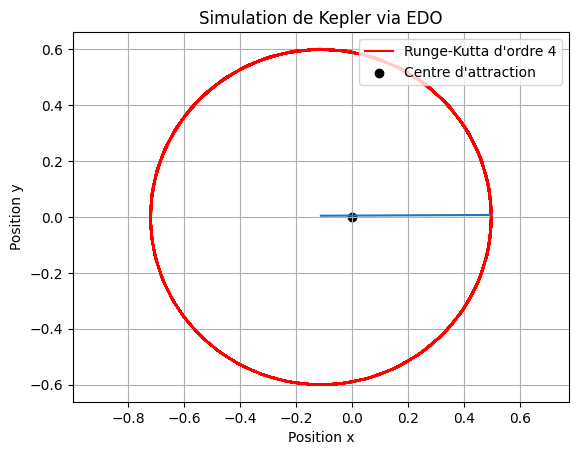

___________________Itération 41___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 29
La période de révolution est 2.56s
T^2 / a^3 = 33.37013228839232 et 4pi^2/MG = 0.6806623724889213
Longeur de l'aphélie: 0.5811627876972635


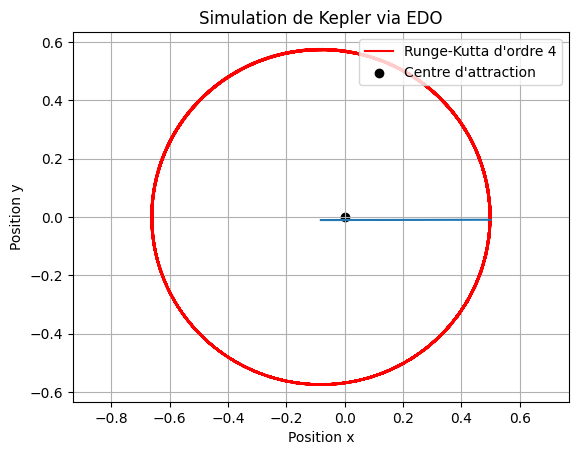

___________________Itération 42___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 30
La période de révolution est 13.46s
T^2 / a^3 = 1050.946188716997 et 4pi^2/MG = 0.6579736267392905
Longeur de l'aphélie: 0.5560745600822701


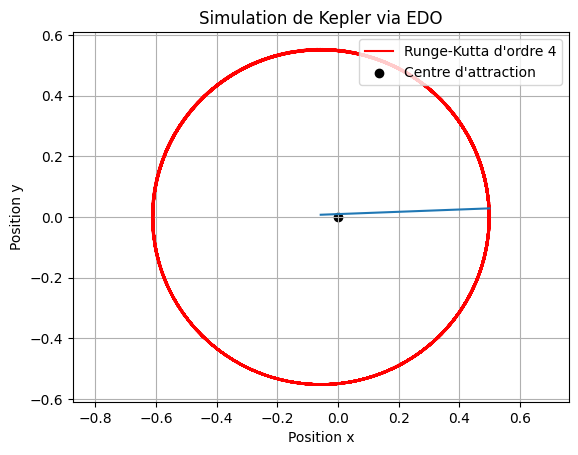

___________________Itération 43___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 31
La période de révolution est 6.25s
T^2 / a^3 = 254.989148003961 et 4pi^2/MG = 0.6367486710380231
Longeur de l'aphélie: 0.5349342999711515


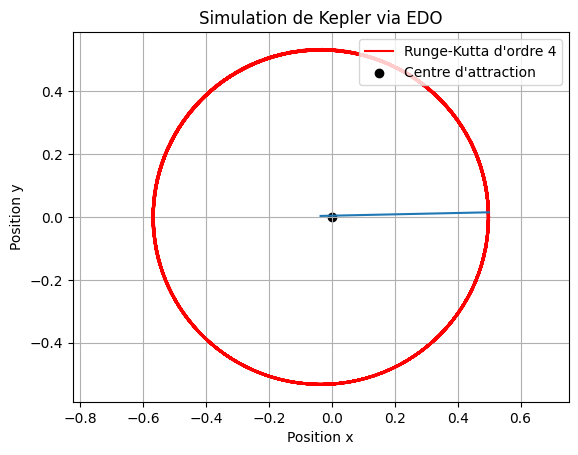

___________________Itération 44___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 32
La période de révolution est 1.46s
T^2 / a^3 = 15.494910460805803 et 4pi^2/MG = 0.6168502750680849
Longeur de l'aphélie: 0.515224549962779


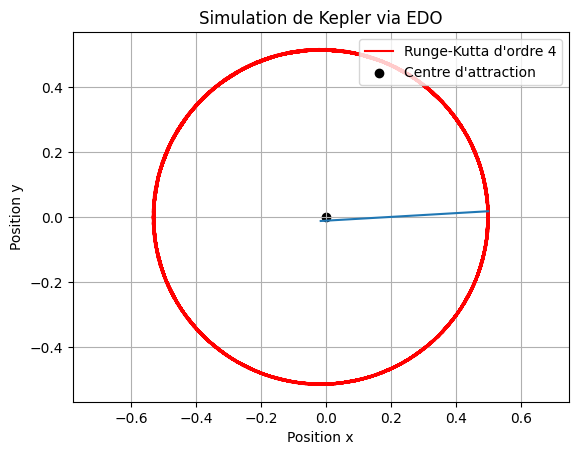

___________________Itération 45___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 34
La période de révolution est 4.13s
T^2 / a^3 = 149.74314870229227 et 4pi^2/MG = 0.5805649647699622
Longeur de l'aphélie: 0.4847412286980607


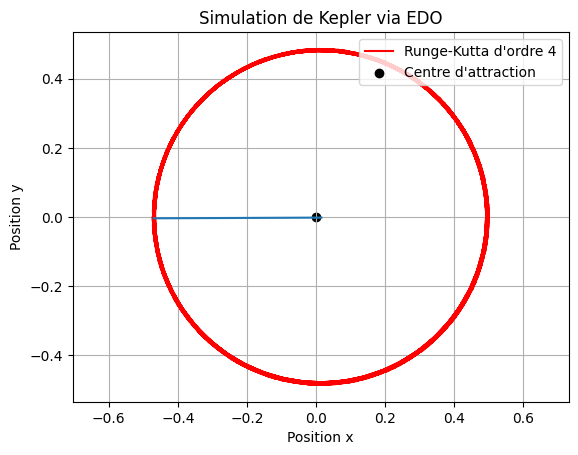

___________________Itération 46___________________
Pour une masse du soleil de 1 et une const de gravitation universelle de 35
La période de révolution est 10.19s
T^2 / a^3 = 1.1279392049302397 et 4pi^2/MG = 1.1279547886959267
Longeur de l'aphélie: 4.515309495938025


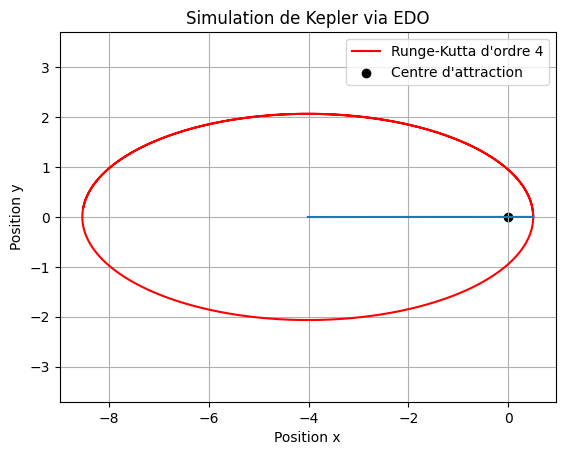

___________________Itération 47___________________
Pour une masse du soleil de 2 et une const de gravitation universelle de 36
La période de révolution est 0.93s
T^2 / a^3 = 8.907125055963615 et 4pi^2/MG = 0.5483113556160755
Longeur de l'aphélie: 0.458554990454478


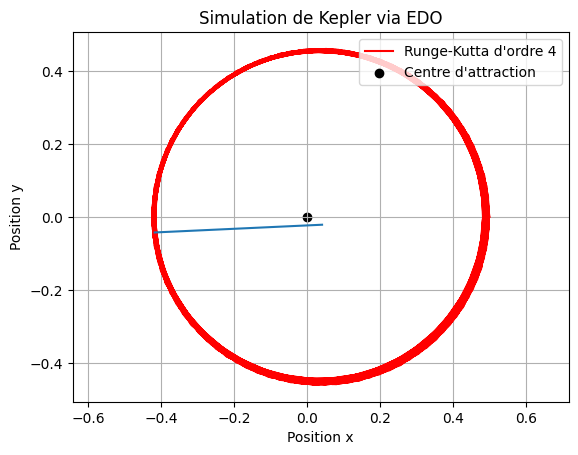

___________________Itération 48___________________
Pour une masse du soleil de 1 et une const de gravitation universelle de 38
La période de révolution est 2.72s
T^2 / a^3 = 1.0389432183321543 et 4pi^2/MG = 1.0389057264304586
Longeur de l'aphélie: 1.9238978009565313


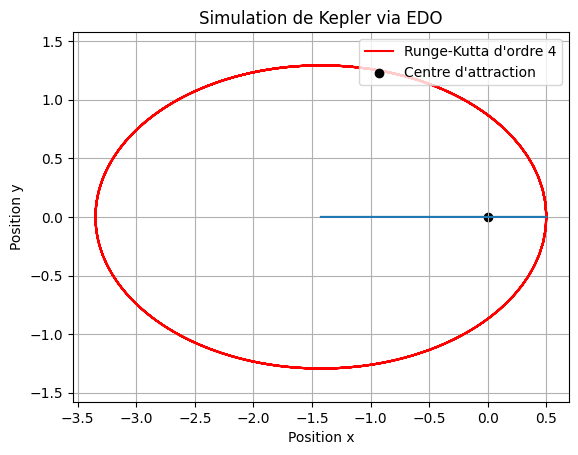

In [135]:
# M_soleil = 1
# G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5
i = 1
for G_temp in range (1, 40, 1):
    for M_soleil in range(1, 10, 1):

        xRK4, yRK4, t, u_4, v_4 = fct_RK4_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)
        a, ind_min, ind_max = aphelie(xRK4, yRK4)
        periode = get_periode_revolution(xRK4, yRK4, t, 0.002)
        if periode is None:
            continue

        print(f"___________________Itération {i}___________________")
        print(f"Pour une masse du soleil de {M_soleil} et une const de gravitation universelle de {G_temp}")
        print(f"La période de révolution est {periode}s")
        T_a = periode**2 / a**3
        b = 4*np.pi**2/(M_soleil*G_temp)
        print(f"T^2 / a^3 = {T_a} et 4pi^2/MG = {b}")

        plt.figure(i)
        plt.plot(xRK4, yRK4, label="Runge-Kutta d'ordre 4", linestyle="-", color="r")
        x_mid = (xRK4[ind_min] - xRK4[ind_max])/2
        y_mid = (yRK4[ind_min] - yRK4[ind_max])/2
        x_a = [xRK4[ind_min], xRK4[ind_max]+x_mid]
        y_a = [yRK4[ind_min], yRK4[ind_max]+y_mid]
        plt.plot(x_a, y_a)

        # Ajouter le centre d'attraction (astre central)
        plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

        # Labels et légende
        plt.xlabel("Position x")
        plt.ylabel("Position y")
        plt.title("Simulation de Kepler via EDO")
        print(f"Longeur de l'aphélie: {abs(x_mid)}")
        plt.legend(loc = "upper right")
        plt.grid()
        plt.axis("equal")  # Pour conserver les proportions réelles

        plt.show()
        i+=1


Longeur de l'aphélie: -88.92618609462583


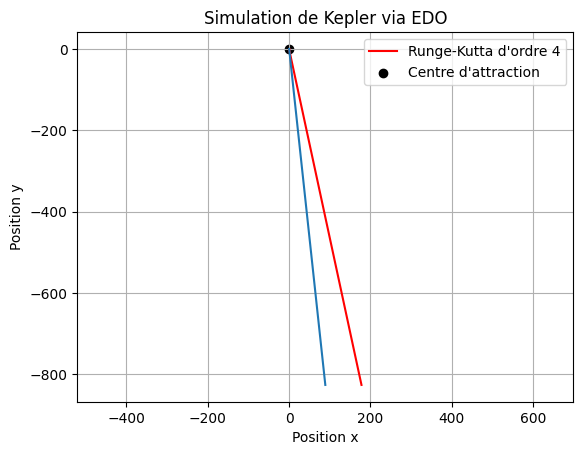

In [136]:
plt.plot(xRK4, yRK4, label="Runge-Kutta d'ordre 4", linestyle="-", color="r")
x_mid = (xRK4[ind_min] - xRK4[ind_max])/2
x_a = [xRK4[ind_min], xRK4[ind_max]+x_mid]
y_a = [yRK4[ind_min], yRK4[ind_max]]
plt.plot(x_a, y_a)

# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
print(f"Longeur de l'aphélie: {x_mid}")
plt.legend(loc = "upper right")
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()